# Advent of Code 2018

## Day 1

In [1]:
import numpy as np
f = open('input_day_1')
np.array([int(s) for s in f]).sum()

522

In [2]:
x, xs, missing = 0, set(), True
while missing:
    try:
        f = open('input_day_1')
        for l in f:
            x += int(l)
            assert x not in xs
            xs.add(x)
    except AssertionError:
        missing = False
x

73364

## Day 2

In [3]:
f = open('input_day_2')
two, three = 0, 0
for l in f:
    d = dict()
    for c in l.strip():
        d[c] = 1 + d.get(c, 0)
    values = list( d.values() )
    if values.count(2):
        two += 1
    if values.count(3):
        three += 1
two * three

5390

In [4]:
try:
    for a in open('input_day_2'):
        for b in open('input_day_2'):
            count = 0
            for ca, cb in zip( a.strip(), b.strip() ):
                if ca != cb:
                    count += 1
            assert count != 1
except AssertionError:
    print( ''.join([ ca for ca, cb in zip( a.strip(), b.strip() ) if ca == cb ]) )

nvosmkcdtdbfhyxsphzgraljq


## Day 3

In [5]:
claimed = np.full( (1000, 1000), False)
overlaps = np.full( (1000, 1000), False)
for l in open('input_day_3'):
    position, size = ( lambda r: (r[2][:-1].split(','), r[3].split('x')) )( l.split() )
    c, r = ( int( s ) for s in position )
    for dc in range( int( size[0] ) ):
        for dr in range( int( size[1] ) ):
            if claimed[c + dc, r + dr]:
                overlaps[ c + dc, r + dr ] = True
            else:
                claimed[c + dc, r + dr] = True
overlaps.sum()

110827

In [6]:
for l in open('input_day_3'):
    position, size = ( lambda r: (r[2][:-1].split(','), r[3].split('x')) )( l.split() )
    c, r = ( int( s ) for s in position )
    overlapped = False
    for dc in range( int( size[0] ) ):
        for dr in range( int( size[1] ) ):
            overlapped = overlapped or overlaps[ c + dc, r + dr ]
    if not overlapped:
        print(l)

#116 @ 864,693: 21x17



## Day 4

In [7]:
s = open('input_day_4').read()
guards = dict()
for guard in set([line.split()[0] for line in s.split('Guard ')[1:]]):
    guards[ guard ] = np.full( 60, 0 )
ls = s.split('\n')
ls.sort()
time = None
for l in ls:
    if 'Guard' in l:
        guard = l.split( 'Guard' )[1].split()[0]
        time = None
    elif time:
        for t in range( time, int( l.split()[ 1 ].split( ':' )[ 1 ][ : -1 ]) ):
            guards[ guard ][ t ] = guards[ guard ][ t ] + 1
        time = None
    elif l:
        time = int( l.split()[ 1 ].split( ':' )[ 1 ][ : -1 ] )
    
cumm = { v.sum(): k for k, v in guards.items() }
guard = cumm[ max( list( cumm.keys() ) ) ]
guards[ guard ].argmax() * int( guard[ 1 : ] )

84636

In [8]:
maxes = { v.max(): k for k, v in guards.items() }
guard = maxes[ max( list( maxes.keys() ) ) ]
guards[ guard ].argmax() * int( guard[ 1 : ] )

91679

## Day 5

In [9]:
def squeeze(s):
    t = ' '
    for c in s:
        if c != t[ -1 ] and c.casefold() == t[ -1 ].casefold():
            t = t[ : -1 ]
        else:
            t += c
    return t[1:]
s = open('input_day_5').read()[ : -1 ]
len( squeeze( s ) )

10450

In [10]:
lens = dict()
for c in range(ord('A'), ord('Z') + 1 ):
    lens[ chr(c) ] = len( squeeze( s.replace( chr(c), '' ).replace( chr(c + 32), '' ) ) )
min( list( lens.values() ) )

4624

## Day 6

In [11]:
class Point():
    def __init__( self, p ):
        self.x = p[0]
        self.y = p[1]
    def distance( self, x, y ):
        return abs( x - self.x ) + abs( y - self.y )
    def __repr__(self):
        return '< {}, {} >'.format( self.x, self.y )

class Points(list):
    def max( self ):
        return Point( ( max( [ p.x for p in self ] ), max( [ p.y for p in self ] ) ) )
    def min( self ):
        return Point( ( min( [ p.x for p in self ] ), min( [ p.y for p in self ] ) ) )

In [12]:
f = open('input_day_6')
points = Points(
    [
        Point( coord ) for coord in (
            ( int(v1), int(v2) ) for v1, v2 in [
                l.strip().split(',') for l in f
            ]
        )
    ]
)
p_max = points.max()
p_min = points.min()
grid = np.full( ( p_max.x + 1, p_max.y + 1 ) , None )
for x in range( p_min.x, p_max.x + 1 ):
    for y in range( p_min.y, p_max.y + 1 ):
        d = { p : p.distance( x, y ) for p in points }
        values = list( d.values() )
        vmin = min( values )
        if values.count( vmin ) == 1:
            grid[x, y] = list( d.keys() )[ values.index( vmin ) ]
candidates = set(points) - (
    set(grid[p_min.x, :])
    | set(grid[p_max.x, :])
    | set(grid[:, p_min.y])
    | set(grid[:, p_max.y])
    | set([None])
)
max( [ (grid == k).sum() for k in candidates ] )

3871

In [13]:
grid = np.full( ( p_max.x + 1, p_max.y + 1 ) , None )
for x in range( p_min.x, p_max.x + 1 ):
    for y in range( p_min.y, p_max.y + 1 ):
        grid[x, y] = sum( [ p.distance( x, y ) for p in points ] )
( grid[p_min.x:, p_min.y:] < 10000 ).sum()

44667

## Day 7

In [14]:
from collections import defaultdict
before = defaultdict( set )
after = defaultdict( set )
for l in open('input_day_7'):
    temp = l.split()
    before[ temp[1] ].add( temp[7] )
    after[ temp[7] ].add( temp[1] )
order = list()
def traverse( avail ):
    if avail:
        for c in sorted( avail ):
            if after[ c ].issubset( set( order ) ):
                break
        order.append( c )
        avail |= before[ c ]
        traverse( avail  - set( order ) )
traverse( set( before.keys() ) - set( after.keys() ) )
''.join( order )

'ACBDESULXKYZIMNTFGWJVPOHRQ'

In [15]:
from collections import defaultdict
before = defaultdict( set )
after = defaultdict( set )
for l in open('input_day_7'):
    temp = l.split()
    before[ temp[1] ].add( temp[7] )
    after[ temp[7] ].add( temp[1] )
order = list()
workers, max_workers, delay = dict(), 5, 60
def traverse( avail, seconds = 0 ):
    seconds += 1
    for c in sorted( avail ):
        if len( workers ) >= max_workers:
            break
        if after[ c ].issubset( set( order ) ):
            workers[ c ] = ord( c ) - ord( 'A' ) + 1 + delay
    done = list()
    for w in workers:
        workers[ w ] = workers[ w ] - 1
        if not workers[ w ]:
            done.append( w ) # in theory, many workers can be done simultaneously
    for w in done:
        order.append( w )
        avail |= before[ w ]
        del workers[ w ]
    if avail or workers:
        seconds = traverse( avail  - set( order ) - set( workers ), seconds )
    return seconds
traverse( set( before.keys() ) - set( after.keys() ) )

980

## Day 8

In [16]:
vals = ( int( s ) for s in open('input_day_8').read().split() )
nodes, cumm = [ ( 1, 0, 0 ) ], 0
while True:
    children, metas, visited = nodes.pop()
    if children == visited:
        for _ in range( metas ):
            cumm += next( vals )
        try:
            children, metas, visited = nodes.pop()
        except IndexError:
            break
    if children > visited:
        nodes.append( ( children, metas, visited + 1 ) )
        nodes.append( ( next( vals ), next( vals ), 0 ) )
    else:
        nodes.append( ( children, metas, visited ) )
cumm

46962

In [17]:
vals = ( int( s ) for s in open('input_day_8').read().split() )
nodes, cumms = [ ( 1, 1, 0 ) ], list()
while True:
    children, metas, visited = nodes.pop()
    if children == visited:
        values = [ cumms.pop() for _ in range( children ) ][::-1]
        try:
            hold = [ next( vals ) for _ in range( metas ) ]
        except StopIteration:
            break
        cumms.append(
            sum( values[ i - 1 ] for i in hold if 0 < i and i <= children ) if values else sum( hold )
        )
        children, metas, visited = nodes.pop()
    if children > visited:
        nodes.append( ( children, metas, visited + 1 ) )
        nodes.append( ( next( vals ), next( vals ), 0 ) )
    else:
        nodes.append( ( children, metas, visited ) )
values[0]

22633

## Day 9

In [18]:
from collections import deque
for players, last in zip(
    [ 9, 10, 13, 17, 21, 30, 465 ],
    [ 25, 1618, 7999, 1104, 6111, 5807, 71940 ]
):
    idx = 1
    circle = deque( [ 0 ] )
    scores = players * [ 0 ]
    for marble in range( 1, last + 1 ):
        if marble % 23:
            idx = ( idx + 2 ) % len( circle )
            circle.insert( idx , marble )
        else:
            idx = ( idx - 7 ) % len( circle )
            scores[ marble % players ] += circle[ idx ] + marble
            circle.remove( circle[ idx ] )
            idx = idx % len( circle )
    print(
        '{} players; last marble is worth {} points: high score is {}'.format(
            players, last, max( scores ) 
        )
    )

9 players; last marble is worth 25 points: high score is 32
10 players; last marble is worth 1618 points: high score is 8317
13 players; last marble is worth 7999 points: high score is 146373
17 players; last marble is worth 1104 points: high score is 2764
21 players; last marble is worth 6111 points: high score is 54718
30 players; last marble is worth 5807 points: high score is 37305
465 players; last marble is worth 71940 points: high score is 384475


In [19]:
# Was stuck, so I checked reddit:
# This function is from https://www.reddit.com/user/marcusandrews
# deque().rotate is a huge performance improvement
#
from collections import deque, defaultdict

def play_game(max_players, last_marble):
    scores = defaultdict(int)
    circle = deque([0])

    for marble in range(1, last_marble + 1):
        if marble % 23 == 0:
            circle.rotate(7)
            scores[marble % max_players] += marble + circle.pop()
            circle.rotate(-1)
        else:
            circle.rotate(-1)
            circle.append(marble)

    return max(scores.values()) if scores else 0

for players, last in zip(
    [ 9, 10, 13, 17, 21, 30, 465, 465 ],
    [ 25, 1618, 7999, 1104, 6111, 5807, 71940, 7194000 ]
):
    print(
        '{} players; last marble is worth {} points: high score is {}'.format(
            players, last, play_game( players, last ) 
        )
    )

9 players; last marble is worth 25 points: high score is 32
10 players; last marble is worth 1618 points: high score is 8317
13 players; last marble is worth 7999 points: high score is 146373
17 players; last marble is worth 1104 points: high score is 2764
21 players; last marble is worth 6111 points: high score is 54718
30 players; last marble is worth 5807 points: high score is 37305
465 players; last marble is worth 71940 points: high score is 384475
465 players; last marble is worth 7194000 points: high score is 3187566597


## Day 10

Image at 10558 seconds


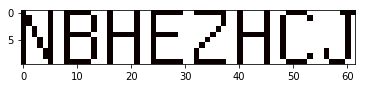

In [22]:
import matplotlib.pyplot as plt
import numpy as np

s = open('input_day_10').read().split('\n')
position = np.array( 
    [ 
        [ int( i ) for i in l.lstrip( 'position=<' ).split( '> velocity=<')[0].split(',') ]
        for l in s if l
    ]
)
velocity = np.array(
    [
        [ int( i ) for i in l.rstrip( '>' ).split( '> velocity=<')[1].split(',') ]
        for l in s if l
    ]
)
def get_extremes( arr ):
    return np.array( [
        [ arr[:,0].min(), arr[:,1].min() ],
        [ arr[:,0].max(), arr[:,1].max() ]
    ] )
def get_size( arr ):
    return ( lambda a: ( a[ 1 ] - a [ 0 ] ).max() )( get_extremes( arr ) )
result, i = position, 0
while  get_size( position + ( i + 1 ) * velocity ) < get_size( result ):
    i += 1
    result = position + i * velocity
extremes = get_extremes( result )
grid = np.full( extremes[1] - extremes[0] + 1, True, dtype=bool )
grid[ result[ :, 0 ] - extremes[0, 0], result[ :, 1 ] - extremes[0, 1] ] = False
print( 'Image at {} seconds'.format( i ))
plt.imshow( grid.T, cmap='hot');

## Day 11

In [23]:
def power( x, y, sn = 6042 ):
    temp = ( ( x + 10 ) * y + sn ) * ( x + 10 )
    return ( int( str( temp )[ -3 ] ) if 99 < temp else 0 ) - 5
grid = np.empty( ( 300, 300), dtype = int )
for x in range( 300 ):
    for y in range( 300 ):
        grid[ x, y ] = power( x + 1, y + 1 )
square = np.empty( ( 297 , 297 ), dtype = int )
for x in range( 297 ):
    for y in range( 297 ):
        square[ x, y ] = grid[ x : x + 3, y : y + 3 ].sum()
tuple( i + 1 for i in np.unravel_index( np.argmax( square, axis=None ), square.shape ) )

(21, 61)

In [24]:
cube = np.zeros( ( 300, 300, 300), dtype = int )
for y in range( 300 ):
    for x in range( 300 ):
        cube[ x, y, 0 ] = power( x + 1, y + 1 )
for z in range( 1, 300 ):
    for y in range( 300 - z ):
        for x in range( 300 - z ):
            cube[ x, y, z ] = cube[ x : x + z + 1, y : y + z + 1, 0 ].sum()
    print(
        '({},{},{}): {}'.format(
            *tuple(
                i + 1 for i in np.unravel_index(
                    np.argmax( cube[:,:,z], axis=None ),
                    cube[:,:,z].shape
                )
            ),
            z + 1,
            cube[:,:,z].max(),
        )
    )

(22,107,2): 16
(21,61,3): 30
(20,273,4): 37
(235,255,5): 44
(165,103,6): 55
(233,253,7): 64
(232,253,8): 76
(235,254,9): 89
(235,253,10): 95
(233,252,11): 108
(232,251,12): 119
(232,250,13): 114
(231,249,14): 104
(230,250,15): 82
(229,253,16): 78
(228,252,17): 68
(227,251,18): 60
(226,250,19): 37
(225,251,20): 23
(224,250,21): 8
(1,280,22): 0
(1,279,23): 0
(1,278,24): 0
(1,277,25): 0
(1,276,26): 0
(1,275,27): 0


KeyboardInterrupt: 

## Day 12

In [25]:
f = open('input_day_12')
state = f.readline().split()[-1]
f.readline()
maps = { k: v for k, v in [ l.strip().split(' => ') for l in f ] }
N = 20
offset = 0
for i in range( N ):
    state = ''.join(
        [
            maps.setdefault( ( '.....' + state + '.....' )[ i : i + 5 ], '.' )
            for i in range( len( state ) + 5 )
        ]
    )
    offset -= 3
sum( [ offset + j for j, c in enumerate( state ) if c == '#' ] )

2767

In [26]:
f = open('input_day_12')
state = f.readline().split()[-1]
f.readline()
maps = { k: v for k, v in [ l.strip().split(' => ') for l in f ] }
N = 50000000000
offset = 0
old_state = None
try:
    for i in range( N ):
        assert state != old_state
        old_state = state
        state = ''.join(
            [
                maps.setdefault( ( '.....' + state + '.....' )[ i : i + 5 ], '.' )
                for i in range( len( state ) + 5 )
            ]
        )
        delta = -3 + len( state ) - len( state.lstrip( '.' ) )
        offset += delta
        state = state.strip( '.' )
except AssertionError:
    offset += ( N - i ) * delta
sum( [ offset + j for j, c in enumerate( state ) if c == '#' ] )

2650000001362

## Day 13

In [27]:
from collections import deque

class Cart():
    def __init__( self, x, y, c ):
        self.x = x
        self.y = y
        self.c = deque( '<^>v', 4 )
        while self.c[ -1 ] != c:
            self.c.rotate( 1 )
        self.rule = deque( [ -1, 0, 1 ], 3 )
    def advance( self ):
        if self.c[ -1 ] == '<': self.x -= 1
        elif self.c[ -1 ] == '^': self.y -= 1
        elif self.c[ -1 ] == '>': self.x += 1
        elif self.c[ -1 ] == 'v': self.y += 1
    def turn( self, c ):
        if c in list( '-|<^>v' ):
            pass
        elif c == '+':
            self.c.rotate( self.rule[ -1] )
            self.rule.rotate( 1 )
        elif self.c[ -1 ] + c in "</ ^\ >/ v\\".split():
            self.c.rotate( 1 )
        else:
            self.c.rotate( -1 )
    def __repr__( self ):
        return '<< {} {} {} >>'.format( self.x, self.y, self.c[ -1 ] )

In [28]:
carts = list()
track = open('input_day_13').read().split('\n')
for y, l in enumerate( track ):
    for x, c in enumerate( l ):
        if c in list( '<^>v' ):
            carts.append( Cart( x, y, c ) )
try:
    while True:
        carts = sorted( sorted( carts, key = lambda a: a.x ), key = lambda a: a.y )
        for cart in carts:
            cart.advance()
            cart.turn( track[ cart.y ][ cart.x ])
            for c in carts:
                assert not ( c != cart and c.x == cart.x and c.y == cart.y )
except AssertionError:
    print( cart, c )

<< 79 128 ^ >> << 79 128 v >>


In [30]:
carts = list()
track = open('input_day_13').read().split('\n')
for y, l in enumerate( track ):
    for x, c in enumerate( l ):
        if c in list( '<^>v' ):
            carts.append( Cart( x, y, c ) )
while len( carts ) > 1:
    carts = sorted( sorted( carts, key = lambda a: a.x ), key = lambda a: a.y )
    crashed = set()
    for cart in carts:
        if cart not in crashed:
            cart.advance()
            cart.turn( track[ cart.y ][ cart.x ])
            for c in carts:
                if c not in crashed and cart not in crashed and c != cart and c.x == cart.x and c.y == cart.y:
                    crashed.add( c )
                    crashed.add( cart )
    for cart in crashed:
        carts.remove( cart )
carts[ 0 ]

<< 3 42 v >>

## Day 14

In [31]:
from collections import deque

q = deque( [ int( c ) for c in '37'] )
e1, e2 = 0, 1
after = 47801
len_q = len( q )
while len_q < after + 10:
    v1, v2 = q[ e1 ], q[ e2 ]
    q.extend( ( lambda x: [ x ] if x < 10 else [ 1, x % 10 ] )( v1 + v2 ) )
    len_q = len( q )
    e1, e2 = ( e1 + 1 + v1 ) % len_q, ( e2 + 1 + v2 ) % len_q
print( ''.join( [ str( q[ after + i ] ) for i in range( 10 ) ] ) )

1342316410


In [32]:
from collections import deque

q = list( [ int( c ) for c in '37'] )
len_q = 2
e1, e2 = 0, 1
recipies = [ int( c ) for c in list( '047801' ) ]
pattern = deque( [ v for v in q ], len( recipies ) )
n = 2 - len( recipies )
try:
    while True:
        v1, v2 = q[ e1 ], q[ e2 ]
        for v in ( lambda x: [ x ] if x < 10 else [ 1, x % 10 ] )( v1 + v2 ):
            q.append( v )
            len_q += 1
            pattern.append( v )
            n += 1
            assert False in [ r == p for r, p in zip( pattern, recipies ) ]
        e1, e2 = ( e1 + 1 + v1 ) % len_q, ( e2 + 1 + v2 ) % len_q
        if not n % 100000: print( '\r', 'running', n, end='' )
except AssertionError:
    pass
n

 running 20200000

20235230

## Day 15

After comparing in detail my intermediate states with those of posted code that yields the "given Part 2 answer", I believe my code is correct, and the given answer for my puzzle input may be incorrect.

In [33]:
from copy import deepcopy

class Cave( list ):
    STARTING_HIT_POINTS = 200
    ATTACK_POWER = 3
    def __init__( self, *args ):
        super().__init__( deepcopy( *args ) )
        self.hit_points = dict()
        for unit in self.get_units():
            self.hit_points[ unit ] = Cave.STARTING_HIT_POINTS
    def __repr__( self ):
        return '\n'.join(
            '{}  {}'.format(
                ''.join( l ),
                [ self.hit_points[ unit ] for unit in self.get_units() if unit[ 1 ] == i ]
            )
            for i, l in enumerate( self )
        )
    def get( self, coord ):
        return self[ coord[ 1 ] ][ coord[ 0 ] ]
    def put( self, coord, val ):
        self[ coord[ 1 ] ][ coord[ 0 ] ] = val
    def get_units( self ):
        units = list()
        for y, l in enumerate( self ):
            for x, c in enumerate( l ):
                if c in list( 'GE' ):
                    units.append( ( x, y ) )
        return units
    def attack_power( self, unit ):
        return Cave.ATTACK_POWER
    def combat_ends( self ):
        return len( set( [ self.get( unit ) for unit in self.get_units() ] ) ) == 1
    @staticmethod
    def get_adjacent( unit ):
        x0, y0 = unit
        return ( (x0, y0-1), (x0-1, y0), (x0+1, y0), (x0, y0+1) )
    @staticmethod
    def sort_into_reading_order( iterable ):
        return sorted(
            sorted(
                iterable,
                key = lambda a: a[ 0 ] ),
            key = lambda a: a[ 1 ]
        )
    def move( self, unit ):
        target = self.forward_scan( unit )
        if target:
            return self.backward_scan( target, unit )
    def forward_scan( self, unit ):
#         i = 0
#         cave = deepcopy( self )
        unit_value = self.get( unit )
        steps = set( [ unit ] )
        explored = set()
        targets = set()
        while steps:
#             i += 1
            new_steps = set()
            for step in steps:
                for coord in self.get_adjacent( step ):
                    coord_value = self.get( coord )
                    if coord_value == '.' and coord not in explored:
                        new_steps.add( coord )
#                         cave.put( coord, str( i%10 ) )
                    elif coord_value in 'EG' and coord_value != unit_value:
                        targets.add( coord )
            explored |= steps
            steps = new_steps
            if targets:
#                 print( cave )
#                 print()
                return self.sort_into_reading_order( targets )[ 0 ]
    def backward_scan( self, target, unit ):
        if unit in self.get_adjacent( target ):
            return
#         i = 0
#         cave = deepcopy( self )
        steps = set( [ target ] )
        explored = set()
        adjacents = set()
        while steps:
#             i += 1
            new_steps = set()
            for step in steps:
                for coord in self.get_adjacent( step ):
                    if self.get( coord ) == '.' and coord not in explored:
                        new_steps.add( coord )
#                         cave.put( coord, str( i%10 ) )
                    elif coord == unit:
                        adjacents.add( step )
            explored |= steps
            steps = new_steps
            if adjacents:
#                 print( cave )
#                 print()
                adjacent = self.sort_into_reading_order( adjacents )[ 0 ]
                self.put( adjacent, self.get( unit ) )
                self.put( unit, '.' )
                self.hit_points[ adjacent ] = self.hit_points[ unit ]
                del self.hit_points[ unit ]
                return adjacent
    def attack( self, unit ):
        if not unit:
            return
        target = None
        target_hit_points = Cave.STARTING_HIT_POINTS + 1
        target_type = 'G' if self.get( unit ) == 'E' else 'E'
        for coord in self.get_adjacent( unit ):
            if (
                self.get( coord ) == target_type
                and
                self.hit_points[ coord ] < target_hit_points
            ):
                target = coord
                target_hit_points = self.hit_points[ target ]
        if target:
            if self.hit_points[ target ] <= self.attack_power( unit ):
                del self.hit_points[ target ]
                self.put( target, '.' )
            else:
                self.hit_points[ target ] -= self.attack_power( unit )
            return target
    def turn( self ):
        dirty = set()
        for unit in self.get_units():
            assert not self.combat_ends()
            if unit not in dirty and unit in self.hit_points and not self.attack( unit ):
#                 print( unit )
                moved_unit = self.move( unit )
                dirty.add( moved_unit )
                if moved_unit:
                    self.attack( moved_unit )
    def play( self ):
        i = 0
        try:
            while True:
#                 print( i )
#                 print( self )
#                 print()
                self.turn()
                i += 1
        except AssertionError:
#             print( self )
            print( i * sum( self.hit_points.values() ) )
            
s = [
    [ list( l ) for l in """#######
#.G...#
#...EG#
#.#.#G#
#..G#E#
#.....#
#######""".split( '\n') ],
    [ list( l ) for l in """#######
#E..EG#
#.#G.E#
#E.##E#
#G..#.#
#..E#.#
#######""".split( '\n') ],
    [ list( l ) for l in """#######
#E.G#.#
#.#G..#
#G.#.G#
#G..#.#
#...E.#
#######""".split( '\n') ],
    [ list( l ) for l in """#######
#.E...#
#.#..G#
#.###.#
#E#G#G#
#...#G#
#######""".split( '\n') ],
    [ list( l ) for l in """#########
#G......#
#.E.#...#
#..##..G#
#...##..#
#...#...#
#.G...G.#
#.....G.#
#########""".split( '\n') ],
    [ list( l.strip('\n') ) for l in open('input_day_15') ]
]

class Cave2( Cave ):
    ELF_ATTACK_POWER = 3
    def attack_power( self, unit ):
        return self.ELF_ATTACK_POWER if self.get( unit ) == 'E' else Cave2.ATTACK_POWER

def save_the_elves( s ):
    Cave2.ELF_ATTACK_POWER = 2
    dead_elf = True
    while dead_elf:
        Cave2.ELF_ATTACK_POWER += 1
        cave = Cave2( s )
        len_elfs = len( [ unit for unit in cave.get_units() if cave.get( unit ) == 'E' ] )
        cave.play()
        dead_elf = len_elfs != len( [ unit for unit in cave.get_units() if cave.get( unit ) == 'E' ] )
    print( cave )
    print( 'Elf attack power is {}'.format( Cave2.ELF_ATTACK_POWER ) )

for ss in s[-1:]:
    save_the_elves( ss )

250648
183960
157410
95130
11926
33535
40230
47215
50048
48438
53136
54120
52038
51165
52374
52374
45465
48951
48951
48951
46728
46728
42392
################################  []
#######.......###.#..###########  []
#######....#.####...#.##########  []
#######....#####......##########  []
######......#..#......##########  []
#########......#.......#########  []
###########............#########  []
############.#.........#########  []
###########..##.......##.##.####  []
########....##....#............#  []
#####..##...#......E.EE........#  [197, 83, 170]
#####..##...........E.........##  [119]
#####..#......#####E...#.......#  [200]
#####........#######...........#  []
#####.......#########..........#  []
#####....E..#########.........##  [164]
####........#########.....#...##  []
#.##..E.E...#########.....#.#.##  [182, 200]
#......E.E..#########.....#.#..#  [152, 47]
#...#..##....#######..#####.#..#  []
##........#...#####...#####.##.#  []
#........#............#####..#.#  []
##..#....

## Day 16

In [34]:
class Computer():
    def __init__( self ):
        self.R = 4 * [ 0 ]
    def addr( self, A, B, C ):
        self.R[ C ] = self.R[ A ] + self.R[ B ]
    def addi( self, A, B, C ):
        self.R[ C ] = self.R[ A ] + B
    def mulr( self, A, B, C ):
        self.R[ C ] = self.R[ A ] * self.R[ B ]
    def muli( self, A, B, C ):
        self.R[ C ] = self.R[ A ] * B
    def banr( self, A, B, C ):
        self.R[ C ] = self.R[ A ] & self.R[ B ]
    def bani( self, A, B, C ):
        self.R[ C ] = self.R[ A ] & B
    def borr( self, A, B, C ):
        self.R[ C ] = self.R[ A ] | self.R[ B ]
    def bori( self, A, B, C ):
        self.R[ C ] = self.R[ A ] | B
    def setr( self, A, B, C ):
        self.R[ C ] = self.R[ A ]
    def seti( self, A, B, C ):
        self.R[ C ] = A
    def gtir( self, A, B, C ):
        self.R[ C ] = 1 if A > self.R[ B ] else 0
    def gtri( self, A, B, C ):
        self.R[ C ] = 1 if self.R[ A ] > B else 0
    def gtrr( self, A, B, C ):
        self.R[ C ] = 1 if self.R[ A ] > self.R[ B ] else 0
    def eqir( self, A, B, C ):
        self.R[ C ] = 1 if A == self.R[ B ] else 0
    def eqri( self, A, B, C ):
        self.R[ C ] = 1 if self.R[ A ] == B else 0
    def eqrr( self, A, B, C ):
        self.R[ C ] = 1 if self.R[ A ] == self.R[ B ] else 0

computer = Computer()
methods = [ a for a in dir(computer) if not a.startswith('__') and a != 'R' ]
hits, codes = list(), list()
try:
    for l in open('input_day_16'):
        l = l.rstrip( '\n' )
        if l.startswith( 'Before: '):
            stop = False
            before = eval( l.lstrip( 'Before: ') )
        elif l.startswith( 'After:  '):
            hits.append( [ eval( l.lstrip( 'After:  ') ) == v for v in results ] )
        elif l:
            codes.append( int( l.split()[ 0 ] ) )
            results = list()
            for m in methods:
                computer.R = before.copy()
                eval( 'computer.' + m + '( ' + ', '.join( l.split()[1:] ) + ' )' )
                results.append( computer.R.copy() )
        else:
            assert not stop
            stop = True
except AssertionError:
    print( 'Matches three or more opcodes: {}'.format( sum( [ sum( row ) >= 3 for row in hits ] ) ) )


Matches three or more opcodes: 640


In [35]:
from collections import defaultdict
import numpy as np

groups = defaultdict( list )
for c, h in zip( codes, hits ):
    groups[ c ].append( h )
for k in groups:
    groups[ k ] = np.array( groups[ k ] ).all( 0 )
while len( groups ) < sum( [ v.sum() for v in groups.values() ] ):
    for k in groups:
        if groups[ k ].sum() == 1:
            for kk in groups:
                if kk != k:
                    groups[ kk ] = np.logical_and( groups[ kk ], np.logical_not( groups[ k ] ) )
opcodes = { k : methods[ np.argwhere( groups[ k ] )[ 0 ][ 0 ] ] for k in groups }
skip = True
computer.R = 4*[ 0 ]
for l in open('input_day_16'):
    if l == '\n':
        skip = False
    elif ':' in l:
        skip = True
    elif l and not skip:
        exec(
            (
                lambda v: 'computer.{}( {}, {}, {} )'.format(
                    opcodes[ int( v[ 0 ] ) ], v[ 1 ], v[ 2 ], v[ 3 ]
                )
            )(
                l.split()
            )
        )
print( 'Register 0: {}'.format( computer.R[ 0 ] ) )

Register 0: 472


## Day 17

In [36]:
class Ground( list ):
    def __init__( self, s ):
        super().__init__()
        xs, ys = list(), list()
        for l in s:
            a, b, c = int( l.split( ',' )[0].split( '=' )[-1] ), *[ int( v ) for v in l.split( '=' )[-1].split( '..' ) ]
            if l.startswith( 'x' ):
                for v in range( b, c + 1 ):
                    xs.append( a ), ys.append( v )
            else:
                for v in range( b, c + 1 ):
                    ys.append( a ), xs.append( v )
        min_x, max_x, min_y, max_y = min( xs ) - 1, max( xs ) + 1, min( ys ), max( ys )
        for y in range( 2 + max_y - min_y ): # added an extra row at the bottom
            self.append( ( 1 + max_x - min_x ) * [ '.' ] )
        for x, y in zip( xs, ys ):
            self[ y - min_y ][ x - min_x ] = '#'
        self[ 0 ][ 500 - min_x ] = '|'
        self.len_row = len( self[0] )
    def __repr__( self ): # removes extra row
        n = len( self[0] )
        if n < 120:
            return '\n'.join([ ''.join( row ) for row in self[ : -1 ] ] )
        l = list()
        for i in range( n // 120 ):
            l.append( '\n'.join([ ''.join( row[ i * 120 : ( i + 1 ) * 120 ] ) for row in self[ : -1 ] ] ) )
        l.append( '\n'.join([ ''.join( row[ ( i + 1 ) * 120 : n ] ) for row in self[ : -1 ] ] ) )
        return '\n\n\n'.join( l )
    def traverse( self ):
        start = None
        for k, ( above, below ) in enumerate( zip( self[ : -1 ], self[ 1 : ] ) ):
            for i in range( self.len_row - 1 ):
                a, b, a1, b1 = above[ i ], below[ i ], above[ i + 1 ], below[ i + 1 ]
                if a == '|' and b not in '#~|':
                    below[ i ] = b = '|'
                    self.updated = True
                if a == '|' and a1 not in '#|' and b in '~#':
                    above[ i + 1 ] = a1 = '|'
                    self.updated = True
                if a == '#' and a1 == '|':
                    start = i + 1
                elif start and a == '|' and a1 == '#':
                    kk = k
                    row = self[ k ]
                    while row[ start - 1 ] == '#' and row[ i + 1 ] == '#' and '#' not in row[ start : i + 1 ]:
                        assert row[ start - 1 ] == '#' and row[ i + 1 ] == '#' and '#' not in row[ start : i + 1 ]
                        for j in range( start, i + 1 ):
                            row[ j ] = '~'
                        self.updated = True
                        k -= 1
                        row = self[ k ]
                    k = kk
                    start = None
                elif a1 == '|':
                    pass
                else:
                    start = None
                idx = self.len_row - 1 - i
                if above[ idx ] == '|' and above[ idx - 1 ] not in '#|' and below[ idx ] in '~#':
                    above[ idx - 1 ] = '|'
                    self.updated = True
            if above[ -1 ] == '|' and below[ -1 ] not in '#~|':
                below[ -1 ] = '|'
                self.updated = True
    def count( self ):
        at_rest, flow = 0, 0
        for row in self[ : -1]: # remove extra row
            at_rest += sum( [ 1 for v in row if v == '~' ] )
            flow += sum( [ 1 for v in row if v == '|' ] )
        return at_rest + flow, at_rest
    def run( self ):
        self.updated = True
        while( self.updated ):
            self.updated = False
            self.traverse()
            print( '\r', 'Water: total = {}; at rest = {}'.format( *self.count() ), end='' )
        
ground = Ground( l.strip('\n') for l in open('input_day_17') )
ground.run()
# ground

 Water: total = 38364; at rest = 30551

## Day 18

In [37]:
from copy import deepcopy
from collections import deque

class Lumber():
    def __init__( self, s ):
        temp = [ [ ' ' ] + list( r ) + [ ' ' ] for r in s ]
        self.len_row = len( temp[ 0 ] )
        edge = self.len_row * [ ' ' ]
        l = list()
        l.append( edge )
        l.extend( temp )
        l.append( edge )
        self.trees = [ [ v == '|' for v in r ] for r in l ]
        self.yards = [ [ v == '#' for v in r ] for r in l ]
        self.fields = [ [ v == '.' for v in r ] for r in l ]
        self.n_trees = deque( [], 3 )
        self.n_yards = deque( [], 3 )
    def traverse( self ):
        trees, yards, fields = ( iter( deepcopy( v ) ) for v in ( self.trees, self.yards, self.fields ) )
        t_rows, y_rows, f_rows = ( deque( ( next( v ), next( v ) ), 3 ) for v in ( trees, yards, fields ))
        for t, y, f in zip( *[ v[ 1 : -1 ] for v in ( self.trees, self.yards, self.fields ) ] ):
            for q, v in zip( ( t_rows, y_rows, f_rows ), ( trees, yards, fields ) ):
                q.append( next( v ) )
            for q in ( self.n_trees, self.n_yards ):
                q.clear()
            t_iters = [ iter( v ) for v in t_rows ]
            y_iters = [ iter( v ) for v in y_rows ]
            for _ in range( 2 ):
                self.n_trees.append( sum( next( v ) for v in t_iters ) )
                self.n_yards.append( sum( next( v ) for v in y_iters ) )
            for i in range( 1, self.len_row - 1 ):
                self.n_trees.append( sum( next( v ) for v in t_iters ) )
                self.n_yards.append( sum( next( v ) for v in y_iters ) )
                n_trees = sum( self.n_trees )
                n_yards = sum( self.n_yards )
                if 3 <= n_trees and f_rows[ 1 ][ i ]:
                    f[ i ], t[ i ] = False, True
                elif 3 <= n_yards and t_rows[ 1 ][ i ]:
                    t[ i ], y[ i ] = False, True
                elif ( 1 == n_yards or 0 == n_trees ) and y_rows[ 1 ][ i ]:
                    y[ i ], f[ i ] = False, True
    def resources( self ):
        trees = sum( sum( v for v in row) for row in self.trees )
        yards = sum( sum( v for v in row) for row in self.yards )
        return trees * yards
    def run( self, n = 10 ):
        resources = list()
        try:
            for i in range( n ):
                self.traverse()
                resources.append( self.resources() )
                for j in range( 2, i // 2 ):
                    assert resources[ - j : ] != resources[ - 2 * j : - j ]
        except AssertionError:
            return resources[ - j : ][ ( n - i - 2 ) % j ]
        return resources[ - 1 ]

lumber = Lumber( l.strip('\n') for l in open('input_day_18') )
lumber.run()

467819

In [38]:
lumber = Lumber( l.strip('\n') for l in open('input_day_18') )
lumber.run( 1000000000 )

195305

## Day 19

In [39]:
class FlowControl( Computer ):
    def __init__( self, program ):
        super().__init__()
        self.R = 6 * [ 0 ]
        self.ip = int( program[ 0 ].split()[ - 1 ] )
        temp = {
            'addr' : self.addr,
            'addi' : self.addi,
            'mulr' : self.mulr,
            'muli' : self.muli,
            'banr' : self.banr,
            'bani' : self.bani,
            'borr' : self.borr,
            'bori' : self.bori,
            'setr' : self.setr,
            'seti' : self.seti,
            'gtir' : self.gtir,
            'gtri' : self.gtri,
            'gtrr' : self.gtrr,
            'eqir' : self.eqir,
            'eqri' : self.eqri,
            'eqrr' : self.eqrr
        }
        self.instructions = [ ( temp[ a ], int( b ), int( c ), int( d ) ) for a, b, c, d in [ l.split() for l in program[ 1 : ] ] ]
        self.listing = ( program[ 1 : ] ).copy()
    def execute( self ):
        ( lambda f, a, b, c: f( a, b, c ) )( *( self.instructions[ self.R[ self.ip ] ] ) )
        self.R[ self.ip ] += 1
    def run( self ):
        try:
            while True:
                self.execute()
        except IndexError:
            print( 'Program Termination. Register 0 holds the value: {}'.format( self.R[ 0 ] ) )
        
fc = FlowControl( [ l.strip('\n') for l in open('input_day_19') ] )
fc.run()

Program Termination. Register 0 holds the value: 2106


In [40]:
class Simplify( FlowControl ):
    def run( self ):
        print( 'Starting register values: {}'.format( self.R ))
        while self.R[ self.ip ] != 1:
            self.execute()
        n = self.R[ 2 ]
        print(
            'Calculated Termination. Register 0 holds the value: {}'.format(
                sum( [ i for i in range(1, n + 1 ) if not n % i ] ) 
            )
        )

simplify = Simplify( [ l.strip('\n') for l in open('input_day_19') ] )
simplify.R[ 0 ] = 1
simplify.run( )

Starting register values: [1, 0, 0, 0, 0, 0]
Calculated Termination. Register 0 holds the value: 23021280


## Day 20

Here's a clever solution from the reddit forum - a team effort. Quite different than the approach I took which was useless for part two of the puzzle.

In [41]:
from collections import defaultdict
d=defaultdict(lambda:1e9)
p=d[0]=0
s=[]
for c in open( 'input_day_20' ).read().strip( '\n' )[1:-1]:
    if '('==c:
        s.append(p)
    elif ')'==c:
        p=s.pop()
    elif '|'==c:
        p=s[-1]
    else:
        l=p;
        p += 1j**'ESWN'.index( c );
        d[p]=min(d[p],d[l]+1)
v=d.values()
print(max(v),sum(x>=1e3 for x in v))

4155 8434


## Day 21

In [42]:
class Halt( FlowControl ):
    def run( self ):
        while True:
            before = self.R.copy()
            self.execute()
#             print( before, before[ self.ip ], self.listing[ before[ self.ip ] ], self.R )
            if before[ self.ip] == 28:
                print( 'For fewest instructions before halt, Register 0: {}'.format( self.R[ 3 ] ) )
                break

halt = Halt( [ l.strip('\n') for l in open('input_day_21') ] )
halt.run()

For fewest instructions before halt, Register 0: 9107763


In [43]:
import numpy as np
from numba import jitclass
from numba import int32

spec = [
    ('r0', int32),
    ('r1', int32),
    ('r2', int32),
    ('r3', int32),
    ('r4', int32),
    ('r5', int32),
]

@jitclass(spec)
class Transpose():
    def __init__( self ):
        self.r0 = 0
        self.r1 = 0
        self.r2 = 0
        self.r3 = 0
        self.r4 = 0
        self.r5 = 0
        self.main()
    def block_0( self ):
        self.r3 = 123
    def block_1_2( self ):
        self.r3 &= 456
        self.r3 = self.r3 == 72
    def block_5( self ):
        self.r3 = 0
    def block_6_7( self ):
        self.r4 = self.r3 | 65536
        self.r3 = 7041048
    def block_8_13( self ):
        self.r5 = self.r4 & 255
        self.r3 += self.r5
        self.r3 &= 16777215
        self.r3 *= 65899
        self.r3 &= 16777215
        self.r5 = 256 > self.r4
    def block_17( self ):
        self.r5 = 0
    def block_18_20( self ):
        self.r1 = self.r5 + 1
        self.r1 *= 256
        self.r1 = self.r1 > self.r4
    def block_24( self ):
        self.r5 += 1
    def block_26( self ):
        self.r4 = self.r5
    def block_28( self ):
        self.r5 = self.r3 == self.r0
    def main( self ):
        r3 = list()
        self.block_0()
        self.block_1_2()
        while not self.r3:
            self.block_1_2()
        self.block_5()
        while True:
            self.block_6_7()
            while True:
                self.block_8_13()
                if self.r5:
                    break
                self.block_17()
                while True:
                    self.block_18_20()
                    if self.r1:
                        break
                    self.block_24()
                self.block_26()
            self.block_28()
            if not len( r3 ):
                print( 'For fewest instructions before halt, Register 0:', self.r3 )
            elif self.r3 in r3:
                print( 'For most instructions before halt, Register 0:', r3[ - 1 ] )
                break
            r3.append( self.r3 )
            assert not self.r5
Transpose();

For fewest instructions before halt, Register 0: 9107763
For most instructions before halt, Register 0: 7877093


## Day 22

This code is practically certain to be correct, yet my calculated path length is 7 minutes ( one tool change ) lower than the given answer of 1029. See confirming checks in the cell below my answer.

In [44]:
import networkx as nx

f = open( 'input_day_22' )
depth = int( f.readline().strip('\n').split()[-1] )
target = [ int( v ) for v in f.readline().strip('\n').split()[-1].split( ',' ) ]

class Maze():
    def __init__( self, depth, target ):
        self.depth = depth
        self.target = tuple( target )
        self.gi_cache = dict()
        self.graph = nx.Graph()
        print( 'Depth: {}, Target: {}'.format( self.depth, self.target ) )
    def cave_type( self, pos ):
        return self.erosion_level( pos ) % 3
    def erosion_level( self, pos ):
        return ( self.geologic_index( pos ) + self.depth ) % 20183
    def geologic_index( self, pos ):
        try:
            return self.gi_cache[ pos ]
        except KeyError:
            if pos in [ ( 0, 0 ), self.target ]:
                res = 0
            elif pos[ 0 ] == 0:
                res = 48271 * pos[ 1 ]
            elif pos[ 1 ] == 0:
                res = 16807 * pos[ 0 ]
            else:
                x, y = pos
                res = self.erosion_level( ( x - 1, y ) ) * self.erosion_level( ( x, y - 1 ) )
            self.gi_cache[ pos ] = res
            return res
    def total_risk( self ):
        return sum( [ 
            self.cave_type( ( x, y ) )
            for x in range( self.target[ 0 ] + 1 )
            for y in range( self.target[ 1 ] + 1 )
        ] )
    def build( self, len_x, len_y ):
        for pos in ( ( x, y ) for x in range( len_x ) for y in range( len_y ) ):
            cave = self.cave_type( pos )
            for dx, dy in [ ( 0, 1 ), ( 0, - 1 ), ( 1, 0 ), ( -1, 0 ) ]:
                new_pos = ( pos[ 0 ] + dx, pos[ 1 ] + dy )
                if new_pos[ 0 ] < 0 or new_pos[ 1 ] < 0:
                    continue
                new_cave = self.cave_type( new_pos )
                for item, new_item in [
                    ( item, new_item ) for item in range( 3 ) for new_item in range( 3 )
                    if item != cave and new_item != new_cave
                ]:
                    self.graph.add_edge(
                        ( pos, item ),
                        ( new_pos, new_item ),
                        weight = 1 if item == new_item else 8
                    )
    def get_distance( self ):
        return nx.shortest_path_length( self.graph, ( ( 0 , 0 ), 1 ), ( self.target, 1 ), weight = 'weight' )
    def get_path( self ):
        return nx.shortest_path( self.graph, ( ( 0 , 0 ), 1 ), ( self.target, 1 ), weight = 'weight' )
                
maze = Maze( depth, target )
print( 'Total risk level: {}'.format( maze.total_risk() ) )
maze.build( target[ 0 ] + 100, target[ 1 ] + 100 )
print( 'Fewest number of minutes to reach target: {}'.format( maze.get_distance() ) )

Depth: 8103, Target: (9, 758)
Total risk level: 7743
Fewest number of minutes to reach target: 1022


In [45]:
depth = 510
target = ( 10 , 10 )
maze = Maze( depth, target )
print( 'Total risk level: {}'.format( maze.total_risk() ) )
maze.build( target[ 0 ] + 10, target[ 1 ] + 10 )
print( 'Fewest number of minutes to reach target: {}'.format( maze.get_distance() ) )
print( '\n', '\n'.join( [ ''.join( [ '.=|'[ maze.cave_type( ( x, y ) ) ] for x in range( target[ 0 ] + 6 ) ] ) for y in range( target[ 1 ] + 6 ) ] ) )
maze.get_path()

Depth: 510, Target: (10, 10)
Total risk level: 114
Fewest number of minutes to reach target: 45

 .=.|=.|.|=.|=|=.
.|=|=|||..|.=...
.==|....||=..|==
=.|....|.==.|==.
=|..==...=.|==..
=||.=.=||=|=..|=
|.=.===|||..=..|
|..==||=.|==|===
.=..===..=|.|||.
.======|||=|=.|=
.===|=|===.===||
=|||...|==..|=.|
=.=|=.=..=.||==|
||=|=...|==.=|==
|=.=||===.|||===
||.|==.|.|.||=||


[((0, 0), 1),
 ((0, 1), 1),
 ((0, 2), 1),
 ((0, 3), 0),
 ((0, 4), 0),
 ((0, 5), 0),
 ((1, 5), 0),
 ((2, 5), 0),
 ((2, 6), 0),
 ((2, 7), 2),
 ((2, 8), 2),
 ((2, 9), 2),
 ((3, 9), 2),
 ((4, 9), 2),
 ((5, 9), 2),
 ((5, 10), 2),
 ((5, 11), 2),
 ((5, 12), 2),
 ((6, 12), 2),
 ((7, 12), 2),
 ((8, 12), 2),
 ((8, 11), 2),
 ((8, 10), 2),
 ((9, 10), 2),
 ((10, 10), 1)]

## Day 23

In [46]:
import numpy as np
f = open( 'input_day_23' )

data = [
    ( tuple( int( v ) for v in s1.split( ',' ) ), int( s2 ) )
    for s1, s2 in [ l.lstrip( 'pos=<' ).rstrip( '\n' ).split( '>, r=' ) for l in f ]
]
loc, r = np.array( [ v[ 0 ] for v in data ] ), np.array( [ v[ 1 ] for v in data ] )
center, radius = loc[ r.argmax() ], r.max()
print( 'Number of nanobots in range of the largest signal: {}'.format( sum( abs( loc - center ).sum( 1 ) <= radius ) ) )

Number of nanobots in range of the largest signal: 721


In [47]:
import networkx as nx

def teleporter( f, graph = nx.Graph() ):
    nanobots = [
        ( ( ( tuple( int( v ) for v in s1.split( ',' ) ) ), int( s2 ) ) )
        for s1, s2 in [ l.lstrip( 'pos=<' ).rstrip( '\n' ).split( '>, r=' ) for l in f ]
    ]
    nanobot = nanobots.pop()
    while nanobots:
        center, r = nanobot
        graph.add_edges_from(
            [ ( nanobot, n ) for n in nanobots
             if sum( [ abs( c - c1 ) for c, c1 in zip( center, n[ 0 ] ) ] ) <= ( r + n[ 1 ] )
            ] )
        nanobot = nanobots.pop()
    for clique in nx.find_cliques( graph ):
        if len( nanobots ) < len( clique ):
            nanobots = clique
    nanobots.sort( key = lambda n: sum( [ abs( c ) for c in n[ 0 ] ] ) - n[ 1 ], reverse = True )
    center, r = nanobots[ 0 ]
    assert all( [ abs( c ) <= r for c in center ] ) # assume furthest nanobot of the clique is entirely in one octant
    return sum( [ abs( c ) for c in center ] ) - r
    
print(
    'Shortest distance to largest number of nanobots: {}'.format(
        teleporter( open( 'input_day_23' ) )
    )
)

Shortest distance to largest number of nanobots: 93130765


## Day 24

In [48]:
import re
from copy import deepcopy

class Group():
    def __init__( self, *args ):
        self.units = args[ 0 ] 
        self.hit_points = args[ 1 ]
        self.nominal_damage = args[ 2 ]
        self.initiative = args[ 3 ]
        self.attack_type = args[ 4 ]
        self.immune_to = args[ 5 ]
        self.weak_to = args[ 6 ]
    def set_boost( self, boost ):
        self.damage = self.nominal_damage + boost
    def effective_power( self ):
        return self.units * self.damage
    def calculate_damage_to( self, target ):
        if self.attack_type in target.immune_to:
            return 0
        elif self.attack_type in target.weak_to:
            return 2 * self.effective_power()
        else:
            return self.effective_power()
    def attack( self ):
        if self.target:
            self.target.units -= self.calculate_damage_to( self.target ) // self.target.hit_points
            if self.target.units < 0:
                self.target.units = 0

class Army( list ):
    def __init__( self, team ):
        self.team = team
        super().__init__()
    def prepare( self, boost = 0 ):
        for group in self:
            group.set_boost( boost )
        return self
    def target_selection( self, army ):
        army = sorted( army, key = lambda group: group.initiative )
        army.sort( key = lambda group: group.effective_power() )
        self.sort( key = lambda group: group.initiative )
        self.sort( key = lambda group: group.effective_power() )
        self.reverse()
        for group in self:
            group.target = sorted(
                army, key = lambda g: group.calculate_damage_to( g )
            ).pop() if army else None
            if group.target and group.calculate_damage_to( group.target ):
                army.remove( group.target )
    def remove_the_dead( self ):
        for group in self.copy():
            if group.units <= 0:
                self.remove( group )
    
class Theater():
    def __init__( self, army1, army2, boost = 0 ):
        self.army1 = army1.prepare( boost if army1.team == 'Immune System' else 0 )
        self.army2 = army2.prepare( boost if army2.team == 'Immune System' else 0 )
        done = [ 0, 0 ]
        hold = [ sum( [ g.units for g in army] ) for army in [ self.army1, self.army2 ] ]
        while sum( hold ) != sum( done ):
            done = hold
            self.fight()
            hold = [ sum( [ g.units for g in army] ) for army in [ self.army1, self.army2 ] ]
        if self.army1 and self.army2:
            print( 'Boost: {}; Stalemate: {}'.format( boost, done ) )
        else:
            print( 'Boost: {}; Winner: {} with {} units.'.format(
                boost, self.army1.team if self.army1 else self.army2.team, max( done ) ) )
    def fight( self ):
        self.army1.target_selection( self.army2 )
        self.army2.target_selection( self.army1 )
        for group in sorted( self.army1 + self.army2, key = lambda g: g.initiative, reverse = True ):
            group.attack()
        self.army1.remove_the_dead()
        self.army2.remove_the_dead()
        
f = open( 'input_day_24')
team = None
armies = list()
for line in f:
    if ':' in line:
        team = line.strip( ':' ).strip( ':\n' )
        army = Army( team )
        armies.append( army )
    units, hit_points, damage, initiative, attack_type, immune_to, weak_to = 7 * [ list() ]
    if 'units' in line:
        units, hit_points, damage, initiative = [ int( v ) for v in re.findall( r'\d+', line ) ]
        attack_type = line.split(' damage')[0].split()[-1]
    if 'immune to' in line:
        immune_to = line.split('immune to ')[1].split(';')[0].split(')')[0].split(', ')
    if 'weak to' in line:
        weak_to = line.split('weak to ')[1].split(';')[0].split(')')[0].split(', ')
    if units:
        army.append( Group( units, hit_points, damage, initiative, attack_type, immune_to, weak_to ) )

for i in range( 36 ):
    Theater( *[ deepcopy( a ) for a in armies], i );

Boost: 0; Winner: Infection with 20150 units.
Boost: 1; Winner: Infection with 19353 units.
Boost: 2; Winner: Infection with 18715 units.
Boost: 3; Winner: Infection with 18440 units.
Boost: 4; Winner: Infection with 18143 units.
Boost: 5; Winner: Infection with 17712 units.
Boost: 6; Winner: Infection with 17499 units.
Boost: 7; Winner: Infection with 16414 units.
Boost: 8; Winner: Infection with 15643 units.
Boost: 9; Winner: Infection with 14891 units.
Boost: 10; Winner: Infection with 14191 units.
Boost: 11; Winner: Infection with 13550 units.
Boost: 12; Winner: Infection with 12837 units.
Boost: 13; Winner: Infection with 12079 units.
Boost: 14; Winner: Infection with 11041 units.
Boost: 15; Winner: Infection with 9406 units.
Boost: 16; Stalemate: [3302, 5717]
Boost: 17; Stalemate: [3869, 5642]
Boost: 18; Stalemate: [4322, 5623]
Boost: 19; Stalemate: [4699, 5589]
Boost: 20; Stalemate: [4844, 5577]
Boost: 21; Stalemate: [5278, 5542]
Boost: 22; Stalemate: [6381, 5517]
Boost: 23; Sta

## Day 25

In [49]:
f = open( 'input_day_25')
class Point( tuple ):
    def distance( self, other ):
        return sum( [ abs( a - b ) for a, b in zip( self, other ) ] )

constelations = [ [ Point( int( v ) for v in l.split( ',' ) ), ] for l in f ]
len_constelations = None
while len_constelations != len( constelations ):
    print( 'working...' )
    len_constelations = len( constelations )
    for c1 in constelations:
        for c2 in [ c for c in constelations if c != c1 ]:
            if any( [p1.distance( p2 )<= 3 for p1 in c1 for p2 in c2 ] ):
                c1.extend( c2 )
                c2.clear()
    constelations = [ c for c in constelations if c ]
len( constelations )

working...
working...
working...


305